This notebook is part of the `nbsphinx` documentation: https://nbsphinx.readthedocs.io/.

# Code Cells

## Code, Output, Streams

An empty code cell:

Two empty lines:

Leading/trailing empty lines:

In [1]:


# 2 empty lines before, 1 after


A simple output:

In [2]:
6 * 7

42

The standard output stream:

In [3]:
print('Hello, world!')

Hello, world!


Normal output + standard output

In [4]:
print('Hello, world!')
6 * 7

Hello, world!


42

The standard error stream is highlighted and displayed just below the code cell.
The standard output stream comes afterwards (with no special highlighting).
Finally, the "normal" output is displayed.

In [5]:
import sys

print("I'll appear on the standard error stream", file=sys.stderr)
print("I'll appear on the standard output stream")
"I'm the 'normal' output"

I'll appear on the standard output stream


I'll appear on the standard error stream


"I'm the 'normal' output"

<div class="alert alert-info">

Note

Using the IPython kernel, the order is actually mixed up,
see https://github.com/ipython/ipykernel/issues/280.

</div>

## Special Display Formats

See [IPython example notebook](https://nbviewer.jupyter.org/github/ipython/ipython/blob/main/examples/IPython Kernel/Rich Output.ipynb).

### Local Image Files

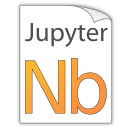

In [6]:
from IPython.display import Image
i = Image(filename='images/notebook_icon.png')
i

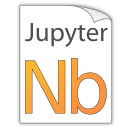

In [7]:
display(i)

See also [SVG support for LaTeX](markdown-cells.ipynb#SVG-support-for-LaTeX).

In [8]:
from IPython.display import SVG
SVG(filename='images/python_logo.svg')

### Image URLs

In [9]:
Image(url='https://www.python.org/static/img/python-logo-large.png')

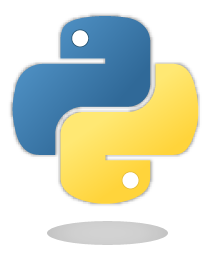

In [10]:
Image(url='https://www.python.org/static/img/python-logo-large.png', embed=True)

In [11]:
Image(url='https://jupyter.org/assets/homepage/main-logo.svg')

### Math

In [12]:
from IPython.display import Math
eq = Math(r'\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0)')
eq

<IPython.core.display.Math object>

In [13]:
display(eq)

<IPython.core.display.Math object>

In [14]:
from IPython.display import Latex
Latex(r'This is a \LaTeX{} equation: $a^2 + b^2 = c^2$')

<IPython.core.display.Latex object>

In [15]:
%%latex
\begin{equation}
\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0)
\end{equation}

<IPython.core.display.Latex object>

### Plots

<div class="alert alert-info">

Make sure to use at least version 0.1.6 of the `matplotlib-inline` package
(which is an automatic dependency of the `ipython` package).

</div>

By default, the plots created with the "inline" backend have the wrong size.
More specifically, PNG plots (the default) will be slightly larger than SVG and PDF plots.

This can be fixed easily by creating a file named `matplotlibrc`
(in the directory where your Jupyter notebooks live,
e.g. in this directory: [matplotlibrc](matplotlibrc))
and adding the following line:

    figure.dpi: 96

If you are using Git to manage your files,
don't forget to commit this local configuration file to your repository.
Different directories can have different local configurations.
If a given configuration should apply to multiple directories,
symbolic links can be created in each directory.

For more details, see
[Default Values for Matplotlib's "inline" Backend](https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/plotting/matplotlib-inline-defaults.ipynb).

By default, plots are generated in the PNG format.
In most cases,
it looks better
if SVG plots are used for HTML output
and PDF plots are used for LaTeX/PDF.
This can be achieved by setting
[nbsphinx_execute_arguments](configuration.ipynb#nbsphinx_execute_arguments)
in your `conf.py` file like this:

```python
nbsphinx_execute_arguments = [
    "--InlineBackend.figure_formats={'svg', 'pdf'}",
]
```
    
In the following example, `nbsphinx` should use an SVG image in the HTML output
and a PDF image for LaTeX/PDF output
(other Jupyter clients like JupyterLab will still show the default PNG format).

In [16]:
import matplotlib.pyplot as plt

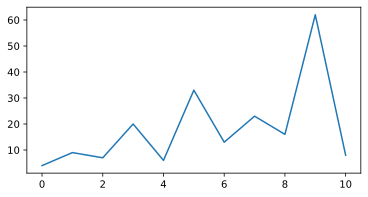

In [17]:
fig, ax = plt.subplots(figsize=[6, 3])
ax.plot([4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8]);

For comparison,
this is how it would look in PNG format ...

In [18]:
%config InlineBackend.figure_formats = ['png']

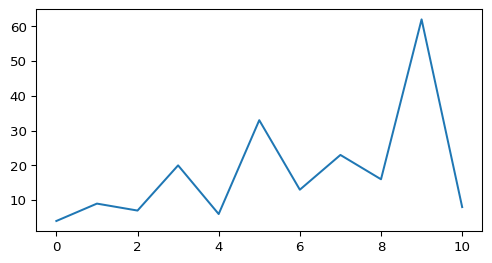

In [19]:
fig

... and in `'png2x'` (a.k.a. `'retina'`) format:

In [20]:
%config InlineBackend.figure_formats = ['png2x']

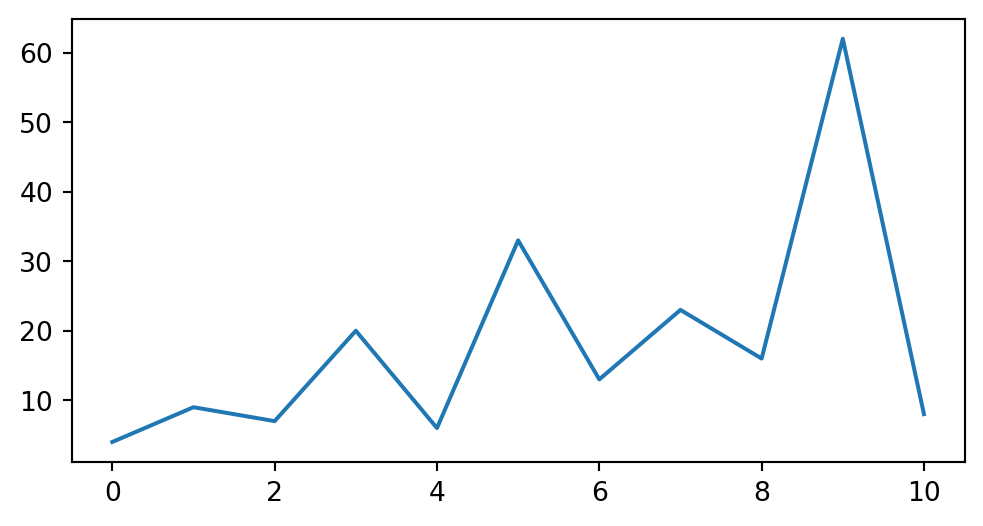

In [21]:
fig

### Pandas Dataframes

[Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)
should be displayed as nicely formatted HTML tables (if you are using HTML output).

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.DataFrame(np.random.randint(0, 100, size=[10, 4]),
                  columns=[r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$'])
df

$\alpha$  $\beta$  $\gamma$  $\delta$
0        13       57        65        73
1        60       44        28        24
2        50       45        25        69
3        43       16        43        43
4        82       47        14        11
5        51       92        63        50
6         0       43        52        66
7        93       43        31        65
8        28       60        85        42
9        25       13        56        18

### Markdown Content

In [24]:
from IPython.display import Markdown

In [25]:
md = Markdown("""
# Markdown

It *should* show up as **formatted** text
with things like [links] and images.

[links]: https://jupyter.org/

![Jupyter notebook icon](images/notebook_icon.png)

## Markdown Extensions

There might also be mathematical equations like
$a^2 + b^2 = c^2$
and even tables:

A     | B     | A and B
------|-------|--------
False | False | False
True  | False | False
False | True  | False
True  | True  | True

""")
md


# Markdown

It *should* show up as **formatted** text
with things like [links] and images.

[links]: https://jupyter.org/

![Jupyter notebook icon](images/notebook_icon.png)

## Markdown Extensions

There might also be mathematical equations like
$a^2 + b^2 = c^2$
and even tables:

A     | B     | A and B
------|-------|--------
False | False | False
True  | False | False
False | True  | False
True  | True  | True



### YouTube Videos

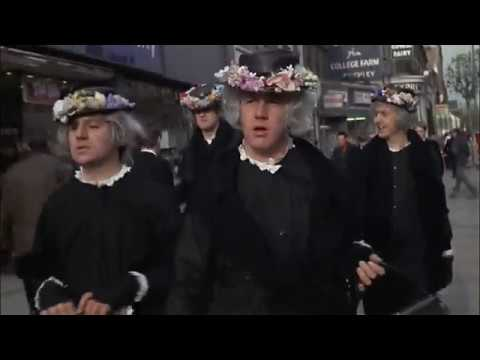

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('9_OIs49m56E')

### Interactive Widgets (HTML only)

The basic widget infrastructure is provided by
the [ipywidgets](https://ipywidgets.readthedocs.io/) module.
More advanced widgets are available in separate packages,
see for example https://jupyter.org/widgets.

The JavaScript code which is needed to display Jupyter widgets
is loaded automatically (using RequireJS).
If you want to use non-default URLs or local files,
you can use the
[nbsphinx_widgets_path](configuration.ipynb#nbsphinx_widgets_path) and
[nbsphinx_requirejs_path](configuration.ipynb#nbsphinx_requirejs_path)
settings.

In [27]:
import ipywidgets as w

In [28]:
slider = w.IntSlider()
slider.value = 42
slider

IntSlider(value=42)

A widget typically consists of a so-called "model" and a "view" into that model.

If you display a widget multiple times,
all instances act as a "view" into the same "model".
That means that their state is synchronized.
You can move either one of these sliders to try this out:

In [29]:
slider

IntSlider(value=42)

You can also link different widgets.

Widgets can be linked via the kernel
(which of course only works while a kernel is running)
or directly in the client
(which even works in the rendered HTML pages).

Widgets can be linked uni- or bi-directionally.

Examples for all 4 combinations are shown here:

In [30]:
link = w.IntSlider(description='link')
w.link((slider, 'value'), (link, 'value'))
jslink = w.IntSlider(description='jslink')
w.jslink((slider, 'value'), (jslink, 'value'))
dlink = w.IntSlider(description='dlink')
w.dlink((slider, 'value'), (dlink, 'value'))
jsdlink = w.IntSlider(description='jsdlink')
w.jsdlink((slider, 'value'), (jsdlink, 'value'))
w.VBox([link, jslink, dlink, jsdlink])

In [31]:
tabs = w.Tab()
for idx, obj in enumerate([df, fig, eq, i, md, slider]):
    out = w.Output()
    with out:
        display(obj)
    tabs.children += out,
    tabs.set_title(idx, obj.__class__.__name__)
tabs

<div class="alert alert-info">

Other Languages

The examples shown here are using Python,
but the widget technology can also be used with
different Jupyter kernels
(i.e. with different programming languages).

</div>

#### Troubleshooting

To obtain more information if widgets are not displayed as expected, you will need to look at the error message in the web browser console.

> To figure out how to open the web browser console, you may look at the web browser documentation:  
> Chrome: https://developer.chrome.com/docs/devtools/open/#shortcuts  
> Firefox: https://developer.mozilla.org/en-US/docs/Tools/Web_Console#opening-the-web-console

The error is most probably linked to the JavaScript files not being loaded or loaded in the wrong order within the HTML file. To analyze the error, you can inspect the HTML file within the web browser (e.g.: right-click on the page and select *View Page Source*) and look at the `<head>` section of the page. That section should contain
some JavaScript libraries. Those relevant for widgets are:

```html
<!-- require.js is a mandatory dependency for jupyter-widgets -->
<script crossorigin="anonymous" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js"></script>
<!-- jupyter-widgets JavaScript -->
<script type="text/javascript" src="https://unpkg.com/@jupyter-widgets/html-manager@^0.18.0/dist/embed-amd.js"></script>
<!-- JavaScript containing custom Jupyter widgets -->
<script src="../_static/embed-widgets.js"></script>
```

The two first elements are mandatory. The third one is required only if you designed your own widgets but did not publish them on npm.js.

If those libraries appear in a different order, the widgets won't be displayed. 

Here is a list of possible solutions:

- If the widgets are **not displayed**, see [#519](https://github.com/spatialaudio/nbsphinx/issues/519).
- If the widgets are **displayed multiple times**, see [#378](https://github.com/spatialaudio/nbsphinx/issues/378).

### Arbitrary JavaScript Output (HTML only)

In [32]:
%%javascript

var text = document.createTextNode("Hello, I was generated with JavaScript!");
// Content appended to "element" will be visible in the output area:
element.appendChild(text);

<IPython.core.display.Javascript object>

### Unsupported Output Types

If a code cell produces data with an unsupported MIME type, the Jupyter Notebook doesn't generate any output.
`nbsphinx`, however, shows a warning message.

In [33]:
display({
    'text/x-python': 'print("Hello, world!")',
    'text/x-haskell': 'main = putStrLn "Hello, world!"',
}, raw=True)

## ANSI Colors

The standard output and standard error streams may contain [ANSI escape sequences](https://en.wikipedia.org/wiki/ANSI_escape_code) to change the text and background colors.

In [34]:
print('BEWARE: \x1b[1;33;41mugly colors\x1b[m!', file=sys.stderr)
print('AB\x1b[43mCD\x1b[35mEF\x1b[1mGH\x1b[4mIJ\x1b[7m'
      'KL\x1b[49mMN\x1b[39mOP\x1b[22mQR\x1b[24mST\x1b[27mUV')

ABCDEFGHIJKLMNOPQRSTUV


BEWARE: ugly colors!


The following code showing the 8 basic ANSI colors is based on https://tldp.org/HOWTO/Bash-Prompt-HOWTO/x329.html.
Each of the 8 colors has an "intense" variation, which is used for bold text.

In [35]:
text = ' XYZ '
formatstring = '\x1b[{}m' + text + '\x1b[m'

print(' ' * 6 + ' ' * len(text) +
      ''.join('{:^{}}'.format(bg, len(text)) for bg in range(40, 48)))
for fg in range(30, 38):
    for bold in False, True:
        fg_code = ('1;' if bold else '') + str(fg)
        print(' {:>4} '.format(fg_code) + formatstring.format(fg_code) +
              ''.join(formatstring.format(fg_code + ';' + str(bg))
                      for bg in range(40, 48)))

            40   41   42   43   44   45   46   47  
   30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 


ANSI also supports a set of 256 indexed colors.
The following code showing all of them is based on [http://bitmote.com/index.php?post/2012/11/19/Using-ANSI-Color-Codes-to-Colorize-Your-Bash-Prompt-on-Linux](https://web.archive.org/web/20190109005413/http://bitmote.com/index.php?post/2012/11/19/Using-ANSI-Color-Codes-to-Colorize-Your-Bash-Prompt-on-Linux).

In [36]:
formatstring = '\x1b[38;5;{0};48;5;{0}mX\x1b[1mX\x1b[m'

print('  + ' + ''.join('{:2}'.format(i) for i in range(36)))
print('  0 ' + ''.join(formatstring.format(i) for i in range(16)))
for i in range(7):
    i = i * 36 + 16
    print('{:3} '.format(i) + ''.join(formatstring.format(i + j)
                                      for j in range(36) if i + j < 256))

  +  0 1 2 3 4 5 6 7 8 91011121314151617181920212223242526272829303132333435
  0 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 16 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 52 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 88 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
124 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
160 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
196 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
232 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


You can even use 24-bit RGB colors:

In [37]:
start = 255, 0, 0
end = 0, 0, 255
length = 79
out = []

for i in range(length):
    rgb = [start[c] + int(i * (end[c] - start[c]) / length) for c in range(3)]
    out.append('\x1b['
               '38;2;{rgb[2]};{rgb[1]};{rgb[0]};'
               '48;2;{rgb[0]};{rgb[1]};{rgb[2]}mX\x1b[m'.format(rgb=rgb))
print(''.join(out))

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
